<p>
 <img src="./ayitianalytics.png" alt="Ayiti Analytics"width=400 />
</p>

##                                       Ayiti_Analytics_Bootcamp Final_Project


## **Your Nearest Care** 

* **By: Tchalins JEUDY**
                                                                                                        August, 2020


## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## **Project Description:** <a name="introduction"></a>

One afternoon on my way home from school, I was with a friend and suddenly, he screamed with a stomach ache and quickly asked to be taken to the nearest health centre, I was lost and didn't know what to do because we were in a not very busy street, and the ambulances we called couldn't get there in time.
At that moment, I was only concerned about one thing. 

<i>"Where is the nearest health center or hospital that specializes in the treatment of this type of disease?

The project therefore consists of trying to answer this question wherever you are on Haitian territory, it can help save lives.
The purpose of this project can be of interest to everyone, especially people at risk of health problems who travel a lot in Haiti and in rural areas despite the lack of health care centers in the country.

<i>Who is the audience?

Anyone living in or visiting Haiti may be interested in this project but the most important stakeholders are: The public administration, healthcare investors and NGOs.


## Data <a name="data"></a>


In order to carry out this work, data will be needed on all the health centers and their various services offered throughout the national territory of Haiti. For this purpose, several sites have been consulted and data from several previous studies conducted by the United Nations, USAID, and the World Health Organization (WHO) are being collected. 

Source: [OCHA services](https://data.humdata.org/dataset/haiti-healthsites)
        [DHS;SPA,santé 2007](https://dhsprogram.com/publications/publication-spa14-spa-final-reports.cfm)


## Methodology <a name="methodology"></a>

In [1]:
!pip install folium
!pip install geopy
print('librairies installed')

librairies installed


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 292kB/s 
     |████████████████████████████████| 10.9MB 32.1MB/s 


## EDA

In [178]:
#import our library
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import time

import json

import requests
from pandas.io.json import json_normalize
#from bs4 import BeautifulSoup
#from selenium import webdriver

import matplotlib.cm as cm
import matplotlib.colors as colors
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from math import pi
from sklearn import preprocessing
from sklearn.cluster import KMeans
# tranforming json file into a pandas dataframe library
######from pandas.io.json import json_normalize#######
from geopy.geocoders import Nominatim 
import folium
print('librairies iported')

librairies iported


In [179]:
#import geopandas library
import geopandas as gdp

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [212]:
#open data 
gpd_com = gdp.read_file('boundaries/hti_admbnda_adm2_cnigs_20181129.shp')

In [215]:
#Create latitude and longitude data
gpd_com['x']=gpd_com.geometry.centroid.x
gpd_com['y'] =gpd_com.geometry.centroid.y
gpd_com_json = gpd_com.to_json()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  This is separate from the ipykernel package so we can avoid doing imports until


In [182]:
#The head of the dataset gpd_com_final
#gpd_com_final=pd.read_csv('/content/gpd_com_final (1).csv')

In [192]:
#A quick view
#gpd_com_final.head()

In [12]:
#gpd_com_final.drop('Unnamed: 0',axis=1,inplace=True)

In [214]:
#Load a new dataset with population size
dfpop = pd.read_csv('spa_boundaries_com.csv')

In [216]:
#Create a final dataframe with geolocalisation data
gpd_com_final =gpd_com[['ADM2_EN','ADM2_PCODE','x','y','geometry']]

In [217]:
#Take the columns we need in the dataset
dfpop=dfpop[['ADM2_PCODE','IHSI_UNFPA_2019']]

In [218]:
#join the dataset dfpop and gdp_com_final
gpd_com_final= pd.merge(gpd_com_final,dfpop,how='left',on='ADM2_PCODE')

In [219]:
gpd_com_final.shape#['IHSI_UNFPA_2019'].head()

(140, 6)

Text(0.5, 1.0, 'Average MCI  by district by year')

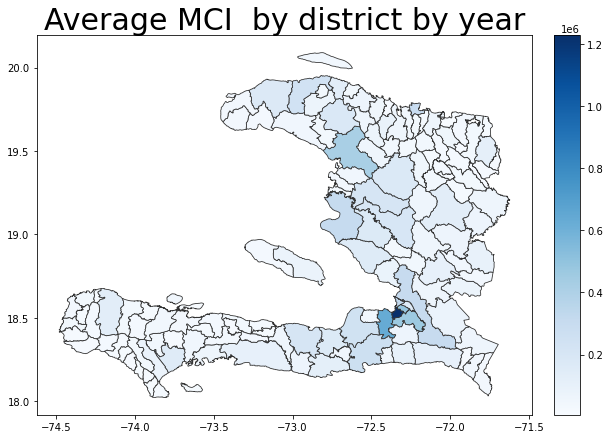

In [221]:

# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(10,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd_com_final.plot(column='IHSI_UNFPA_2019', cmap='Blues', linewidth=0.8, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Average MCI  by district by year',fontsize =30)
#gpd.apply(lambda x: ax.annotate(s=x['Shape_Leng'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=14),axis=1);

#### Load our Dataset 

The dataset dfsites is now ready for cleaning!

In [201]:
def generate_PCODE(depart):
     code = '00'+ str(int(depart))
     return 'HT'+ code[len(code)-2:]
     
def generate_PCODE2(vilcom):
     code = '00'+ str(int(vilcom))
     return code[len(code)-2:]

In [17]:
#dfpro is a dataframe contain the caracteristics of  health sites in Haiti by number and the type 
dfpro=pd.read_sas('HTFC7AFLSP.SAS7BDAT',encoding='latin8')
dfpro['ADM2_PCODE'] = dfpro['DEPART'].apply(lambda x: generate_PCODE(x))+ dfpro['VILCOM'].apply(lambda x: generate_PCODE2(x))
dfpro.head()

,FACIL,REC_TYPE,DEPART,DEPARTN,VILCOM,VILCOMN,LOCALITY,FACTYPE,MGA,FTYPE,IPD_OPD,VISITLN_1,VISITLN_2,VISITLN_3,VISITLN_4,QVDAY_1,QVDAY_2,QVDAY_3,QVDAY_4,QVMONTH_1,QVMONTH_2,QVMONTH_3,QVMONTH_4,QVYEAR_1,QVYEAR_2,QVYEAR_3,QVYEAR_4,QVRESULT_1,QVRESULT_2,QVRESULT_3,QVRESULT_4,NUMVISIT,DAY,MONTH,YEAR,INTVNO,RESULT,PROVDERS,ANCF,FPF,...,Q3166_4D,Q3167,Q3168_1A,Q3168_1B,Q3168_1C,Q3168_1D,Q3168_2A,Q3168_2B,Q3168_2C,Q3168_2D,Q3168_3A,Q3168_3B,Q3168_3C,Q3168_3D,Q3168_4A,Q3168_4B,Q3168_4C,Q3168_4D,Q3169,Q3170,Q3171,Q3172,Q3173,Q3174,Q3175,Q3176,Q3177,Q3178,Q3179,Q3180,Q3181,Q3182,Q3183,Q3184,Q3185,Q3200,Q3201,Q3201A,Q3201B,ADM2_PCODE
0,1.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,7.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,19.0,12.0,2017.0,1104.0,1.0,4.0,0.0,0.0,...,NaN,1.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,4.0,2.0,1.0,3.0,2.0,4.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0,5.0,NaN,NaN,1.0,2.0,NaN,NaN,NaN,HT0111
1,2.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,3.0,1.0,1.0,2.0,1.0,2.0,NaN,NaN,11.0,11.0,NaN,NaN,1.0,1.0,NaN,NaN,2018.0,2018.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,11.0,1.0,2018.0,1201.0,1.0,8.0,0.0,0.0,...,NaN,2.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,3.0,2.0,2.0,4.0,2.0,5.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,HT0111
2,3.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,7.0,12.0,2017.0,1102.0,1.0,13.0,5.0,0.0,...,NaN,1.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,HT0111
3,4.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,5.0,3.0,1.0,2.0,1.0,NaN,NaN,NaN,21.0,NaN,NaN,NaN,12.0,NaN,NaN,NaN,2017.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,21.0,12.0,2017.0,1102.0,1.0,4.0,3.0,0.0,...,NaN,2.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,4.0,3.0,3.0,3.0,2.0,4.0,2.0,3.0,2.0,3.0,2.0,2.0,1.0,4.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,HT0111
4,5.0,A,1.0,Ouest,11.0,Port-Au-Prince,1.0,6.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN,26.0,26.0,NaN,NaN,1.0,1.0,NaN,NaN,2018.0,2018.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,26.0,1.0,2018.0,2403.0,1.0,4.0,3.0,5.0,...,2.0,2.0,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,2.0,4.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,HT0111


In [ ]:
#dfpop = pd.read_csv('spa_boundaries_com.csv')

In [ ]:
#A quick view of the created columns
dfpro['ADM2_PCODE']

In [ ]:
#columns list of the dataset dfpro 
col_total=dfpro.columns.to_list()
col_total[:10]

['FACIL',
 'REC_TYPE',
 'DEPART',
 'DEPARTN',
 'VILCOM',
 'VILCOMN',
 'LOCALITY',
 'FACTYPE',
 'MGA',
 'FTYPE']

In [19]:
#The list of the variables we need to the dataset
list_c=['FACIL','DEPART','VILCOM','DEPARTN','VILCOMN','FACTYPE','MGA','FTYPE','Q400A_01','Q400A_03','Q400A_08','Q400A_12','Q400AT','Q340','Q450','Q112','Q880','Q710_01','Q110']
for i in range(1,21):
    if i<10:
        list_c.append(f'Q102_0{i}')
    else:
        list_c.append(f'Q102_{i}')
        
list_c.append('ADM2_PCODE')
list_c

['FACIL',
 'DEPART',
 'VILCOM',
 'DEPARTN',
 'VILCOMN',
 'FACTYPE',
 'MGA',
 'FTYPE',
 'Q400A_01',
 'Q400A_03',
 'Q400A_08',
 'Q400A_12',
 'Q400AT',
 'Q340',
 'Q450',
 'Q112',
 'Q880',
 'Q710_01',
 'Q110',
 'Q102_01',
 'Q102_02',
 'Q102_03',
 'Q102_04',
 'Q102_05',
 'Q102_06',
 'Q102_07',
 'Q102_08',
 'Q102_09',
 'Q102_10',
 'Q102_11',
 'Q102_12',
 'Q102_13',
 'Q102_14',
 'Q102_15',
 'Q102_16',
 'Q102_17',
 'Q102_18',
 'Q102_19',
 'Q102_20',
 'ADM2_PCODE']

In [20]:
#a view of the observation in a variable for selecting some for the project
dfpro.DEPARTN.unique()

array(['Ouest', "Sud'est", 'Nord', "Nord'Est", 'Artibonite', 'Centre',
       'Sud', "Grand'Anse", "Nord'Ouest", 'Nippes'], dtype=object)

In [21]:
#dfprof is a dataframe contains the variables selected from dfpro
dfp5=dfpro[list_c]
dfp5.head()

,FACIL,DEPART,VILCOM,DEPARTN,VILCOMN,FACTYPE,MGA,FTYPE,Q400A_01,Q400A_03,Q400A_08,Q400A_12,Q400AT,Q340,Q450,Q112,Q880,Q710_01,Q110,Q102_01,Q102_02,Q102_03,Q102_04,Q102_05,Q102_06,Q102_07,Q102_08,Q102_09,Q102_10,Q102_11,Q102_12,Q102_13,Q102_14,Q102_15,Q102_16,Q102_17,Q102_18,Q102_19,Q102_20,ADM2_PCODE
0,1.0,1.0,11.0,Ouest,Port-Au-Prince,7.0,3.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0,3.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,HT0111
1,2.0,1.0,11.0,Ouest,Port-Au-Prince,3.0,1.0,1.0,1.0,1.0,10.0,0.0,18.0,1.0,3.0,25.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,HT0111
2,3.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,3.0,1.0,7.0,25.0,54.0,1.0,141.0,1.0,1.0,201.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,HT0111
3,4.0,1.0,11.0,Ouest,Port-Au-Prince,5.0,3.0,1.0,2.0,4.0,3.0,0.0,13.0,1.0,3.0,7.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,HT0111
4,5.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,2.0,1.0,0.0,2.0,2.0,0.0,10.0,1.0,3.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,HT0111


In [22]:
#A quick view in a column
dfp5['Q110'].head()

0    2.0
1    1.0
2    1.0
3    2.0
4    2.0
Name: Q110, dtype: float64

In [23]:
dfp5.columns

Index(['FACIL', 'DEPART', 'VILCOM', 'DEPARTN', 'VILCOMN', 'FACTYPE', 'MGA',
       'FTYPE', 'Q400A_01', 'Q400A_03', 'Q400A_08', 'Q400A_12', 'Q400AT',
       'Q340', 'Q450', 'Q112', 'Q880', 'Q710_01', 'Q110', 'Q102_01', 'Q102_02',
       'Q102_03', 'Q102_04', 'Q102_05', 'Q102_06', 'Q102_07', 'Q102_08',
       'Q102_09', 'Q102_10', 'Q102_11', 'Q102_12', 'Q102_13', 'Q102_14',
       'Q102_15', 'Q102_16', 'Q102_17', 'Q102_18', 'Q102_19', 'Q102_20',
       'ADM2_PCODE'],
      dtype='object')

In [24]:
#list of new variables name's  
list_v=['facil','DEPART','VILCOM','departn','vilcomn','FACTYPE','MGA','FTYPE','Doc_General','Tech_lab','Nurse','drugist','Staff','Electricity_regular','Ambulance_regular','beds','Machine_radio','Water_run','Hospitalisation','S.Vac_Child','S.Croissance_Child','S_Child','S.Familial_PLanning','S.CPN','S.CPN_vih','S.Accouchement','S.Malaria','S.IST','S.TB','S.VIH','ST.VIH','ST.VIH2','S.Chroniques','S.PChirurgie','SPCésarienne','S.Lab.','S.LabGS','S.TransS','S.Dentaire','ADM2_PCODE']

In [25]:
#rename columns of dfprof
dfp5.columns=list_v
dfp5.head()

,facil,DEPART,VILCOM,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Staff,Electricity_regular,Ambulance_regular,beds,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE
0,1.0,1.0,11.0,Ouest,Port-Au-Prince,7.0,3.0,1.0,2.0,1.0,2.0,0.0,5.0,1.0,3.0,NaN,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,HT0111
1,2.0,1.0,11.0,Ouest,Port-Au-Prince,3.0,1.0,1.0,1.0,1.0,10.0,0.0,18.0,1.0,3.0,25.0,2.0,3.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2.0,HT0111
2,3.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,3.0,1.0,7.0,25.0,54.0,1.0,141.0,1.0,1.0,201.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,HT0111
3,4.0,1.0,11.0,Ouest,Port-Au-Prince,5.0,3.0,1.0,2.0,4.0,3.0,0.0,13.0,1.0,3.0,7.0,2.0,3.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,HT0111
4,5.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,2.0,1.0,0.0,2.0,2.0,0.0,10.0,1.0,3.0,NaN,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,HT0111


The dataset dfprof is now ready for cleaning!

#### Explanation of variables

In ***dfp*** we have the **variables :**

**Doc_General**         :Number of general practitioners

**Tech_lab**            :Number of laboratory technicians

**Nurse**               :Number of nurses

**drugist**             :Number of drugist

**Staff**               :total personal health site

**Electricity_regular** :ability to have continuous electricity

**Ambulance_regular**   :ability to have functional ambulances in the facility

**beds**                : number of beds avalaible

**Machine_radio**       :ability to have perform diagnostic machine

**Water_run**           :ability to have running water

**facil**               : the number of the facility

**departn**             : the geogrraphic distribution by region(department) 

**vilcomn**             : the name of the town or the city of the facility

**FACTYPE**             :Facility type

**MGA**                 :Managing authority(ownership)

**FTYPE**               :Urban/rural

In ***dfsites*** we have the **variables :**

**Département**              :  the geogrraphic distribution by region(department)

**commune**                : the geogrraphic distribution by region(city or town)

**section communale**           :the geogrraphic distribution by region(communal section)

**Name**    :the name of the healthsite

**Catégorie**           :the category of the center according to the WHO classification

**lat**               :the geolocalisation data(latitude)

**lon**              :the geolocalisation data(longitude)

 <a name="analysis"></a>

### Data Cleaning

**cleaning dfsites :**

In [ ]:
#replace for the good synthax
#dfsites['commune']=dfsites['commune'].replace('Pòtoprens','Port-au-Prince')

In [ ]:
#dfsites['commune']=dfsites['commune'].replace('Petyonvil','Pétion-ville')

In [ ]:
#dfsites['commune']=dfsites['commune'].replace('Kafou','Carrefour')

In [ ]:
#list_co=['Commune de','Commune']
#for replacer in list_co:
 #   dfsites['commune']=dfsites['commune'].str.replace(replacer,'')

In [ ]:
#checking for correct calls
#dfsites.Name.value_counts()

In [ ]:
#Create a new dataframe where healthsite is known
#dfsite = dfsites[dfsites['Name'] != 'unknown name']
#dfsite.head()

In [ ]:
#type of the variables
#dfsites.dtypes

In [ ]:
#dfsite.shape

the dfsite is now ready for analysis!

**Cleaning dfp5:**

In [ ]:
dfp5.dtypes

facil                  float64
DEPART                 float64
VILCOM                 float64
departn                 object
vilcomn                 object
FACTYPE                float64
MGA                    float64
FTYPE                  float64
Doc_General            float64
Tech_lab               float64
Nurse                  float64
drugist                float64
Staff                  float64
Electricity_regular    float64
Ambulance_regular      float64
beds                   float64
Machine_radio          float64
Water_run              float64
Hospitalisation        float64
S.Vac_Child            float64
S.Croissance_Child     float64
S_Child                float64
S.Familial_PLanning    float64
S.CPN                  float64
S.CPN_vih              float64
S.Accouchement         float64
S.Malaria              float64
S.IST                  float64
S.TB                   float64
S.VIH                  float64
ST.VIH                 float64
ST.VIH2                float64
S.Chroni

In [26]:
#sum of nul variables 
dfp5.isnull().sum()

facil                    0
DEPART                   0
VILCOM                   0
departn                  0
vilcomn                  0
FACTYPE                  0
MGA                      0
FTYPE                    0
Doc_General             26
Tech_lab                26
Nurse                   26
drugist                 26
Staff                   26
Electricity_regular     26
Ambulance_regular       26
beds                   559
Machine_radio          391
Water_run               26
Hospitalisation         26
S.Vac_Child             26
S.Croissance_Child      26
S_Child                 26
S.Familial_PLanning     26
S.CPN                   26
S.CPN_vih               26
S.Accouchement          26
S.Malaria               26
S.IST                   26
S.TB                    26
S.VIH                   26
ST.VIH                  26
ST.VIH2                 26
S.Chroniques            26
S.PChirurgie            26
SPCésarienne            26
S.Lab.                  26
S.LabGS                 26
S

In [27]:
#describe the variables by simple statistic
include =['object', 'float', 'int'] 
dfp5.describe( include = include) 

,facil,DEPART,VILCOM,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Staff,Electricity_regular,Ambulance_regular,beds,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE
count,1033.000000,1033.000000,1033.000000,1033,1033,1033.000000,1033.000000,1033.000000,1007.00000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,474.000000,642.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1033
unique,NaN,NaN,NaN,10,154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145
top,NaN,NaN,NaN,Ouest,Port-Au-Prince,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HT0112
freq,NaN,NaN,NaN,380,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77
mean,885.375605,3.944821,23.477251,NaN,NaN,5.849952,2.333979,1.624395,1.55710,1.769613,4.412115,0.267130,19.061569,1.632572,2.690169,17.567511,1.781931,1.695134,1.763654,1.302880,1.436941,1.048659,1.249255,1.084409,1.573982,1.641509,1.045680,1.023833,1.420060,1.481629,1.839126,1.813307,1.021847,1.109235,1.893744,1.362463,1.507448,1.873883,1.837140,NaN
std,765.055136,2.977932,13.505157,NaN,NaN,1.203090,1.126572,0.484513,2.38669,3.834363,11.614499,2.504696,33.919420,0.482344,0.707341,42.789626,0.413256,0.948687,0.425048,0.459732,0.496254,0.215262,0.432797,0.278139,0.494742,0.479795,0.208894,0.152605,0.493813,0.499911,0.367597,0.389859,0.146257,0.312089,0.308318,0.480950,0.500193,0.332146,0.369421,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,359.000000,1.000000,12.000000,NaN,NaN,5.000000,1.000000,1.000000,0.00000,0.000000,1.000000,0.000000,5.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,NaN
50%,679.000000,3.000000,21.000000,NaN,NaN,6.000000,2.000000,2.000000,1.00000,1.000000,2.000000,0.000000,9.000000,2.000000,3.000000,5.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,NaN
75%,996.000000,6.000000,32.000000,NaN,NaN,7.000000,3.000000,2.000000,2.00000,2.000000,3.000000,0.000000,18.000000,2.000000,3.000000,15.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN


Correct null values **:**

In [28]:
#replace nul value with 0 because the variables 0 represent that this service is not observed in the health site.
dfp5[['Electricity_regular','Ambulance_regular','Water_run']] =dfp5[['Electricity_regular','Ambulance_regular','Water_run']].fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
#a quick view of the list of columns
dfp5.columns

Index(['facil', 'DEPART', 'VILCOM', 'departn', 'vilcomn', 'FACTYPE', 'MGA',
       'FTYPE', 'Doc_General', 'Tech_lab', 'Nurse', 'drugist', 'Staff',
       'Electricity_regular', 'Ambulance_regular', 'beds', 'Machine_radio',
       'Water_run', 'Hospitalisation', 'S.Vac_Child', 'S.Croissance_Child',
       'S_Child', 'S.Familial_PLanning', 'S.CPN', 'S.CPN_vih',
       'S.Accouchement', 'S.Malaria', 'S.IST', 'S.TB', 'S.VIH', 'ST.VIH',
       'ST.VIH2', 'S.Chroniques', 'S.PChirurgie', 'SPCésarienne', 'S.Lab.',
       'S.LabGS', 'S.TransS', 'S.Dentaire', 'ADM2_PCODE'],
      dtype='object')

In [30]:
#A missing value in services is a missing service and missing services are marked 0
list_S = ['Hospitalisation','S.Vac_Child', 'S.Croissance_Child', 'S_Child', 'S.Familial_PLanning',
       'S.CPN', 'S.CPN_vih', 'S.Accouchement', 'S.Malaria', 'S.IST', 'S.TB', 'S.VIH', 'ST.VIH', 'ST.VIH2', 'S.Chroniques', 'S.PChirurgie',
       'SPCésarienne', 'S.Lab.', 'S.LabGS', 'S.TransS', 'S.Dentaire']

dfp5[list_S]=dfp5[list_S].fillna(0)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [31]:
#replace nul value with 0 because the variables 0 represent that this work tool is not observed in the health site.
dfp5['Machine_radio'] = dfp5['Machine_radio'].fillna(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
#replace the nul values with 1 by hypothesis that a healthsite must have at least 1 doc, 1 laboratory technician, 1 nurse and 1 drugist.
dfp5[['Doc_General','Tech_lab','Nurse','drugist',]] = dfp5[['Doc_General','Tech_lab','Nurse','drugist',]].fillna(1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [33]:
#too many null values in this column 
dfp5=dfp5.drop(['beds'], axis=1)

In [34]:
#There is no logic to replace the null values of this column and it's not too necessary.
dfp5=dfp5.drop(['Staff'], axis=1)

In [35]:
dfp5.shape

(1033, 38)

Assigning the correct value **:**

In [36]:
#2 represent a absence so it's better in 0
dfp5[list_S]=dfp5[list_S].replace(2,0)

In [37]:
#function to replace number code in categorical value
def rep (a):
    if ((a ==2) or (a==3)):
        return "Private"
    elif (a==1):
        return "Public"
    else :
        return 'Mixte'

In [38]:
#apply the replace function to change MGA to categorical variable
dfp5['MGA']=dfp5['MGA'].apply(rep)


In [39]:
#function to replace number code in categorical value 2
def rep2 (a):
    if ((a==1) or (a ==2) or (a==3) or (a==4)):
        return "Hospital"
    elif (a==5):
        return "Healthsite with bed"
    elif (a==6):
        return 'Healthsite without bed'
    else :
        return 'Dispensary'

In [40]:
#apply the replace function to change FACTYPE to categorical variable in the dataframe 2,3 represents: No, and I don't know
dfp5['FACTYPE_letter']=dfp5['FACTYPE'].apply(rep2)


In [41]:
#replace for the good synthax in Electricity_regular
list_a = [2,3]
for a in list_a:
    dfp5['Electricity_regular']=dfp5['Electricity_regular'].replace(a,0)

In [42]:
#replace for the good synthax in Water_run
list_a = [2,3]
for a in list_a:
    dfp5['Water_run']=dfp5['Water_run'].replace(a,0)

In [43]:
#replace for the good synthax in Ambulance_regular
list_a = [2,3]
for a in list_a:
    dfp5['Ambulance_regular']=dfp5['Ambulance_regular'].replace(a,0)

In [44]:
#replace for the good synthax in Machine_radio
list_a = [2,3]
for a in list_a:
    dfp5['Machine_radio']=dfp5['Machine_radio'].replace(a,0)

In [ ]:
pd.set_option('display.max_rows', None)

Knowing that the number of beds for each 1000 hab is 0.7 in Haiti according to the latest statistics published by the site [Index Mundi](https://www.indexmundi.com/fr/haiti/lits_d_hopitaux_par_habitant.html).

And given the problem we encounter with null values for the number of beds per inhabitant for some zones, we will use the number of inhabitants per zone to determine the number of beds per zone, the results will be approximate to reality.

In [ ]:
#dfpop = pd.read_csv('spa_boundaries_com.csv')
#dfpop

In [ ]:
#dfpop1=dfpop[['ADM1_FR','ADM2_FR','IHSI_UNFPA_2019_female','IHSI_UNFPA_2019_male']]

In [ ]:
#dfpop1['population']=dfpop1['IHSI_UNFPA_2019_female']+dfpop1['IHSI_UNFPA_2019_male']

In [ ]:
#dfpop1['beds']=(dfpop1['population']*0.7)/1000

In [ ]:
#dfpop1['beds']=dfpop1['beds'].apply(lambda x: np.round(x))

In [ ]:
#dfpop1.rename(columns={'ADM1_FR':'departn','ADM2_FR':'commune'},inplace=True)
#dfpop1

In [ ]:
#dfpop1.dtypes

### Get dummies

In [45]:
#Create a list with name of the columns that we will convert in numerical values
list_d=['MGA','FACTYPE_letter']

In [46]:
#Create a new dataframe with this variables in numerical 
dfp2=pd.get_dummies(dfp5[list_d])
dfp2.head()

,MGA_Mixte,MGA_Private,MGA_Public,FACTYPE_letter_Dispensary,FACTYPE_letter_Healthsite with bed,FACTYPE_letter_Healthsite without bed,FACTYPE_letter_Hospital
0,0,1,0,1,0,0,0
1,0,0,1,0,0,0,1
2,0,1,0,0,0,1,0
3,0,1,0,0,1,0,0
4,0,1,0,0,0,1,0


In [47]:
#Rename the variables 
dfp2.rename(columns={'MGA_Mixte':'mixte','MGA_Private':'Private','MGA_Public':'Public','FACTYPE_letter_Dispensary':'Dispensary','FACTYPE_letter_Healthsite with bed':'Healthsite with bed','FACTYPE_letter_Healthsite without bed':'Healthsite without bed','FACTYPE_letter_Hospital':'Hospital'},inplace=True)

In [48]:
#concat the dataframe with the same categorical and numerical variables 
df_dum=pd.concat([dfp5,dfp2],axis=1)

In [49]:
dfp5.head()

,facil,DEPART,VILCOM,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE,FACTYPE_letter
0,1.0,1.0,11.0,Ouest,Port-Au-Prince,7.0,Private,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,HT0111,Dispensary
1,2.0,1.0,11.0,Ouest,Port-Au-Prince,3.0,Public,1.0,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,HT0111,Hospital
2,3.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,Private,1.0,7.0,25.0,54.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,HT0111,Healthsite without bed
3,4.0,1.0,11.0,Ouest,Port-Au-Prince,5.0,Private,1.0,2.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,Healthsite with bed
4,5.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,Private,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,Healthsite without bed


In [50]:
#Drop the categorical variables
df_dum.drop(list_d,axis=1,inplace=True)

In [51]:
df_dum.head()

,facil,DEPART,VILCOM,departn,vilcomn,FACTYPE,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE,mixte,Private,Public,Dispensary,Healthsite with bed,Healthsite without bed,Hospital
0,1.0,1.0,11.0,Ouest,Port-Au-Prince,7.0,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,HT0111,0,1,0,1,0,0,0
1,2.0,1.0,11.0,Ouest,Port-Au-Prince,3.0,1.0,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,0,1,0,0,0,1
2,3.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,1.0,7.0,25.0,54.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,HT0111,0,1,0,0,0,1,0
3,4.0,1.0,11.0,Ouest,Port-Au-Prince,5.0,1.0,2.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,1,0,0,1,0,0
4,5.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,1,0,0,0,1,0


In [52]:
#drop the unnecessary variables for the clustering process
df_dro= df_dum.drop(['DEPART','VILCOM','FACTYPE','Healthsite without bed','facil','FTYPE'],axis=1)

In [53]:
df_dro.head()

,departn,vilcomn,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
0,Ouest,Port-Au-Prince,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,HT0111,0,1,0,1,0,0
1,Ouest,Port-Au-Prince,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,0,1,0,0,1
2,Ouest,Port-Au-Prince,7.0,25.0,54.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,HT0111,0,1,0,0,0,0
3,Ouest,Port-Au-Prince,2.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,1,0,0,1,0
4,Ouest,Port-Au-Prince,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,0,1,0,0,0,0


In [143]:
#groupby the data by the department and the commune
df=df_dro.groupby(['departn','ADM2_PCODE'],as_index=False).sum()

In [144]:
df.head()

,departn,ADM2_PCODE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
0,Artibonite,HT0511,28.0,31.0,127.0,5.0,7.0,2.0,2.0,10.0,4.0,14.0,10.0,16.0,11.0,16.0,7.0,5.0,16.0,15.0,10.0,7.0,4.0,5.0,16.0,14.0,2.0,10.0,8.0,1.0,4.0,1,7,8,8,1,2
1,Artibonite,HT0512,4.0,10.0,11.0,1.0,1.0,1.0,0.0,3.0,1.0,6.0,6.0,7.0,6.0,6.0,2.0,1.0,7.0,7.0,5.0,2.0,2.0,2.0,7.0,6.0,0.0,3.0,2.0,0.0,1.0,1,1,5,4,0,1
2,Artibonite,HT0513,4.0,7.0,14.0,0.0,0.0,1.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,1.0,4.0,4.0,0.0,3.0,2.0,0.0,1.0,0,2,2,1,1,1
3,Artibonite,HT0521,8.0,12.0,10.0,3.0,1.0,1.0,1.0,8.0,4.0,12.0,7.0,13.0,11.0,12.0,6.0,5.0,12.0,13.0,4.0,5.0,2.0,2.0,13.0,12.0,1.0,3.0,1.0,1.0,1.0,2,10,3,10,2,1
4,Artibonite,HT0522,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0,0,2,1,1,0


In [146]:
#drop the categorical variables no necessary for the clustering in a new dataframe
dfbon1 = df.drop(['departn','ADM2_PCODE'],axis=1)
dfbon1.head()
display(dfbon1.shape)

(145, 35)

In [57]:
df.to_csv('comin.csv')

In [58]:
#standardize all columns
x = dfbon1.values

#scaler = preprocessing.StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#x_scaled = MinMaxScaler.fit_transform(x)
scaled = scaler.fit_transform(dfbon1)
#dfd1 = pd.DataFrame(x_scaled,columns =dfbon.columns)
dfd1 = pd.DataFrame(scaled,columns=dfbon1.columns)
dfd1.head()

,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
0,0.115702,0.093939,0.162821,0.045872,0.122807,0.1250,0.105263,0.181818,0.153846,0.400000,0.434783,0.234375,0.244444,0.227273,0.259259,0.25,0.205479,0.191781,0.384615,0.114754,0.266667,0.263158,0.214286,0.196970,0.142857,0.151515,0.137931,0.05,0.181818,0.125,0.116667,0.533333,0.444444,0.0625,0.095238
1,0.016529,0.030303,0.014103,0.009174,0.017544,0.0625,0.000000,0.054545,0.038462,0.171429,0.260870,0.093750,0.133333,0.075758,0.074074,0.05,0.082192,0.082192,0.192308,0.032787,0.133333,0.105263,0.085714,0.075758,0.000000,0.045455,0.034483,0.00,0.045455,0.125,0.016667,0.333333,0.222222,0.0000,0.047619
2,0.016529,0.021212,0.017949,0.000000,0.000000,0.0625,0.105263,0.036364,0.038462,0.114286,0.043478,0.046875,0.088889,0.045455,0.074074,0.10,0.041096,0.041096,0.115385,0.049180,0.066667,0.052632,0.042857,0.045455,0.000000,0.045455,0.034483,0.00,0.045455,0.000,0.033333,0.133333,0.055556,0.0625,0.047619
3,0.033058,0.036364,0.012821,0.027523,0.017544,0.0625,0.052632,0.145455,0.153846,0.342857,0.304348,0.187500,0.244444,0.166667,0.222222,0.25,0.150685,0.164384,0.153846,0.081967,0.133333,0.105263,0.171429,0.166667,0.071429,0.045455,0.017241,0.05,0.045455,0.250,0.166667,0.200000,0.555556,0.1250,0.047619
4,0.004132,0.003030,0.000000,0.000000,0.000000,0.0625,0.000000,0.036364,0.000000,0.057143,0.043478,0.015625,0.044444,0.015152,0.037037,0.05,0.013699,0.013699,0.038462,0.000000,0.000000,0.000000,0.014286,0.015152,0.000000,0.030303,0.017241,0.00,0.000000,0.000,0.000000,0.133333,0.055556,0.0625,0.000000


In [59]:
#Change the name of the column
dfd1.shape

(145, 35)

#### K-Means Clustering

In [60]:
!pip install yellowbrick

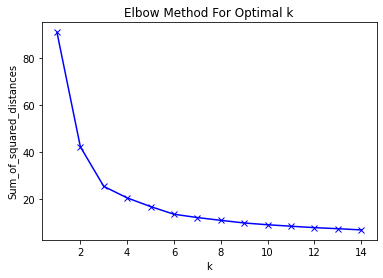

In [61]:
#Elbow method to minimize WSS (within-cluster Sum of Square)
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km =KMeans(n_clusters =k)
    km =km.fit(dfd1)
    Sum_of_squared_distances.append(km.inertia_)
###plotting Elbow
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [62]:
#The optmal number of clusters is 4, train the clustering
kclusters = 4

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfd1)

kmeans.labels_


array([3, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 0, 3, 3, 0, 3, 0, 0, 1, 1, 2, 2, 3, 3, 2, 3, 0, 2, 0, 0, 0, 0,
       3, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0], dtype=int32)

In [63]:
#Insert the cluster label in the dataframe principal
df.insert(0, 'Cluster Labels', kmeans.labels_)

In [64]:
display(df.head(),df.shape)

,Cluster Labels,departn,ADM2_PCODE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
0,3,Artibonite,HT0511,28.0,31.0,127.0,5.0,7.0,2.0,2.0,10.0,4.0,14.0,10.0,16.0,11.0,16.0,7.0,5.0,16.0,15.0,10.0,7.0,4.0,5.0,16.0,14.0,2.0,10.0,8.0,1.0,4.0,1,7,8,8,1,2
1,3,Artibonite,HT0512,4.0,10.0,11.0,1.0,1.0,1.0,0.0,3.0,1.0,6.0,6.0,7.0,6.0,6.0,2.0,1.0,7.0,7.0,5.0,2.0,2.0,2.0,7.0,6.0,0.0,3.0,2.0,0.0,1.0,1,1,5,4,0,1
2,0,Artibonite,HT0513,4.0,7.0,14.0,0.0,0.0,1.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,1.0,4.0,4.0,0.0,3.0,2.0,0.0,1.0,0,2,2,1,1,1
3,3,Artibonite,HT0521,8.0,12.0,10.0,3.0,1.0,1.0,1.0,8.0,4.0,12.0,7.0,13.0,11.0,12.0,6.0,5.0,12.0,13.0,4.0,5.0,2.0,2.0,13.0,12.0,1.0,3.0,1.0,1.0,1.0,2,10,3,10,2,1
4,0,Artibonite,HT0522,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0,0,2,1,1,0


(145, 38)

In [65]:
#Analyze cluster, cluster 1
cluster_1=df.loc[df['Cluster Labels'] == 0]

In [66]:
#Analyze cluster, cluster 2
cluster_2=df.loc[df['Cluster Labels'] == 1]


In [67]:
#Analyze cluster, cluster 3
cluster_3=df.loc[df['Cluster Labels'] == 2]

In [68]:
#Analyze cluster, cluster 4
cluster_4=df.loc[df['Cluster Labels'] == 3]

In [69]:
#df.vilcomn.value_counts()

In [70]:
#dict1={'Anse-!-Foleur':'Anse-a-Foleur','Anse-!-Pitres':'Anse-a-Pitres','L!og!ne':'Leogane','P!tion-ville':'Petion-ville','Valli!res':'Vallieres','Gona!ves':'Gonaives','Limb!':'Limbe','M!le-Saint-Nicolas':'Mole-Saint-Nicolas','Port-!-Piment':'Port-a-Piment','Mirago!ne':'Miragoane','Barad!res':'Baraderes','Grand-Go!ve':'Grand-Goave','Fonds-des-N!gres':'Fonds-des-Negres','La Vall!e':'La Vallée','Petite-Rivi!re de l\'Artibonite':'Petite-Riviere de l\'Artibonite','Roche-!-Bateau':'Roche-a-Bateau','Ma!ssade':'Maissade','Bellad!re':'Belladere','Cit!-Soleil':'Cite-Soleil','Mont-Organis!':'Mont-Organise','J!r!mie':'Jeremie','Fort-Libert!':'Fort-Liberté','Pointe-!-Raquettes':'Pointe-a-Raquettes','Petit-Go!ve':'Petit-Goave','Bas-Limb!':'Bas-Limbé','L\'Est!re':'L\'Estère','Saint-Rapha!l':'Saint-Raphael','Anse-!-Veau':'Anse-à-Veau','Petite-Rivi!re de Nippes':'Petite-Rivière de Nippes','Cap-Ha!tien':'Cap-Haitien','!le-!-Vache':'Ile-à-Vache','Chardonni!res':'Chardonnières','Boucan-Carr!':'Boucan-Carré'}

In [71]:
#A quick statistic view in the cluster 1
cluster_1.describe()

,Cluster Labels,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
count,102.0,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.0,4.147059,3.921569,8.676471,0.431373,0.696078,0.568627,0.323529,1.931373,0.666667,2.343137,2.098039,2.990196,2.441176,2.794118,1.539216,1.382353,2.931373,3.000000,2.147059,1.480392,0.558824,0.627451,2.990196,2.784314,0.205882,1.960784,1.421569,0.235294,0.372549,0.656863,0.950980,1.460784,1.284314,0.637255,0.245098
std,0.0,3.948673,3.811619,12.519420,0.751366,0.909675,0.605418,0.565716,1.387781,0.694153,1.375133,1.246856,1.662011,1.404191,1.537249,1.279477,0.965177,1.630524,1.665016,1.261753,1.021844,0.572878,0.673715,1.662011,1.577236,0.430018,1.334401,1.138318,0.470443,0.716448,0.850103,1.261599,1.157597,1.137806,0.671768,0.454598
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,3.000000,3.000000,6.000000,0.000000,0.000000,1.000000,0.000000,1.500000,1.000000,2.000000,2.000000,2.500000,2.000000,2.000000,1.000000,1.000000,2.000000,2.500000,2.000000,1.000000,1.000000,1.000000,2.500000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.0,5.750000,5.750000,11.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,2.000000,4.000000,4.000000,3.000000,2.000000,1.000000,1.000000,4.000000,4.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000
max,0.0,22.000000,16.000000,114.000000,4.000000,4.000000,2.000000,2.000000,5.000000,3.000000,7.000000,5.000000,8.000000,7.000000,7.000000,6.000000,4.000000,8.000000,8.000000,6.000000,6.000000,2.000000,3.000000,8.000000,7.000000,2.000000,7.000000,6.000000,2.000000,4.000000,4.000000,6.000000,5.000000,5.000000,3.000000,2.000000


In [72]:
#A quick statistic view in the cluster 2
cluster_2.describe()

,Cluster Labels,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,1.0,171.000000,257.500000,631.500000,69.000000,51.500000,12.000000,17.50000,46.500000,23.500000,32.500000,20.000000,55.500000,40.000000,59.500000,25.50000,20.0,63.000000,64.500000,25.000000,51.000000,12.500000,16.000000,63.500000,58.500000,13.500000,58.000000,49.000000,18.000000,19.000000,7.000000,54.500000,8.500000,1.500000,11.000000,18.500000
std,0.0,100.409163,102.530483,210.010714,56.568542,7.778175,5.656854,2.12132,12.020815,3.535534,3.535534,4.242641,13.435029,7.071068,10.606602,2.12132,0.0,15.556349,13.435029,1.414214,14.142136,3.535534,4.242641,10.606602,12.020815,0.707107,11.313708,12.727922,2.828427,4.242641,1.414214,7.778175,3.535534,0.707107,7.071068,3.535534
min,1.0,100.000000,185.000000,483.000000,29.000000,46.000000,8.000000,16.00000,38.000000,21.000000,30.000000,17.000000,46.000000,35.000000,52.000000,24.00000,20.0,52.000000,55.000000,24.000000,41.000000,10.000000,13.000000,56.000000,50.000000,13.000000,50.000000,40.000000,16.000000,16.000000,6.000000,49.000000,6.000000,1.000000,6.000000,16.000000
25%,1.0,135.500000,221.250000,557.250000,49.000000,48.750000,10.000000,16.75000,42.250000,22.250000,31.250000,18.500000,50.750000,37.500000,55.750000,24.75000,20.0,57.500000,59.750000,24.500000,46.000000,11.250000,14.500000,59.750000,54.250000,13.250000,54.000000,44.500000,17.000000,17.500000,6.500000,51.750000,7.250000,1.250000,8.500000,17.250000
50%,1.0,171.000000,257.500000,631.500000,69.000000,51.500000,12.000000,17.50000,46.500000,23.500000,32.500000,20.000000,55.500000,40.000000,59.500000,25.50000,20.0,63.000000,64.500000,25.000000,51.000000,12.500000,16.000000,63.500000,58.500000,13.500000,58.000000,49.000000,18.000000,19.000000,7.000000,54.500000,8.500000,1.500000,11.000000,18.500000
75%,1.0,206.500000,293.750000,705.750000,89.000000,54.250000,14.000000,18.25000,50.750000,24.750000,33.750000,21.500000,60.250000,42.500000,63.250000,26.25000,20.0,68.500000,69.250000,25.500000,56.000000,13.750000,17.500000,67.250000,62.750000,13.750000,62.000000,53.500000,19.000000,20.500000,7.500000,57.250000,9.750000,1.750000,13.500000,19.750000
max,1.0,242.000000,330.000000,780.000000,109.000000,57.000000,16.000000,19.00000,55.000000,26.000000,35.000000,23.000000,65.000000,45.000000,67.000000,27.00000,20.0,74.000000,74.000000,26.000000,61.000000,15.000000,19.000000,71.000000,67.000000,14.000000,66.000000,58.000000,20.000000,22.000000,8.000000,60.000000,11.000000,2.000000,16.000000,21.000000


In [73]:
#A quick statistic view in the cluster 3
cluster_3.describe()

,Cluster Labels,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
count,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,2.0,64.166667,67.166667,160.166667,8.166667,18.166667,3.666667,5.666667,17.666667,8.166667,18.333333,13.00000,26.166667,19.500000,25.166667,12.333333,7.833333,26.500000,26.833333,12.833333,18.833333,3.833333,4.833333,27.666667,23.666667,4.833333,21.166667,17.500000,6.333333,6.500000,7.000000,17.833333,4.333333,2.833333,5.166667,6.000000
std,0.0,26.072335,21.921831,56.524036,3.600926,8.376555,3.204164,2.250926,3.559026,3.250641,8.664102,6.09918,8.183316,8.142481,8.328665,3.983298,3.656045,8.191459,7.250287,6.823977,6.911343,2.041241,2.562551,8.594572,7.284687,3.125167,6.765107,5.822371,3.011091,3.563706,0.894427,7.494442,1.505545,1.722401,4.262237,1.414214
min,2.0,38.000000,39.000000,95.000000,5.000000,8.000000,0.000000,3.000000,14.000000,6.000000,7.000000,5.00000,16.000000,10.000000,16.000000,8.000000,5.000000,16.000000,18.000000,7.000000,13.000000,1.000000,1.000000,17.000000,16.000000,2.000000,13.000000,11.000000,4.000000,2.000000,6.000000,8.000000,2.000000,1.000000,1.000000,4.000000
25%,2.0,45.000000,59.750000,140.500000,6.250000,12.750000,1.500000,3.750000,15.000000,6.000000,11.750000,10.25000,22.000000,13.500000,19.000000,9.500000,6.000000,23.000000,24.000000,7.000000,15.000000,2.500000,4.250000,24.000000,20.250000,4.000000,16.500000,13.250000,4.250000,4.250000,6.250000,14.500000,3.500000,2.000000,2.250000,5.250000
50%,2.0,58.500000,65.000000,150.500000,7.000000,17.000000,3.500000,6.000000,17.000000,6.500000,19.000000,12.00000,23.500000,18.500000,23.500000,12.000000,6.500000,24.000000,24.500000,11.500000,16.500000,4.000000,5.000000,24.500000,21.500000,4.000000,22.000000,17.500000,5.500000,6.500000,7.000000,16.000000,5.000000,2.500000,3.500000,6.000000
75%,2.0,76.500000,68.750000,159.750000,8.500000,22.750000,4.750000,7.500000,19.750000,9.250000,25.500000,15.25000,32.500000,25.750000,31.000000,13.750000,7.750000,31.000000,29.500000,16.750000,19.500000,5.500000,5.000000,33.250000,25.000000,4.000000,23.000000,19.500000,6.750000,8.000000,7.750000,22.000000,5.000000,3.000000,8.500000,6.750000
max,2.0,107.000000,106.000000,265.000000,15.000000,31.000000,9.000000,8.000000,23.000000,14.000000,28.000000,23.00000,37.000000,30.000000,37.000000,19.000000,15.000000,39.000000,39.000000,23.000000,32.000000,6.000000,9.000000,40.000000,37.000000,11.000000,32.000000,27.000000,12.000000,12.000000,8.000000,29.000000,6.000000,6.000000,11.000000,8.000000


In [74]:
#A quick  view in the cluster 4
cluster_4.describe()

,Cluster Labels,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
count,35.0,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.0,12.685714,14.000000,38.857143,1.828571,2.485714,1.142857,1.085714,7.342857,2.114286,8.228571,6.714286,11.000000,8.857143,10.485714,4.200000,3.800000,10.771429,11.057143,6.800000,4.457143,1.628571,1.800000,11.057143,10.114286,0.857143,5.685714,4.228571,0.828571,1.400000,1.914286,5.142857,4.514286,5.942857,1.342857,1.028571
std,0.0,9.554092,10.046949,38.306153,1.464998,2.187820,0.845154,1.067472,3.114887,1.430167,3.308507,2.432276,4.179783,3.524226,4.002730,2.111593,2.246566,4.201440,4.358513,3.402421,2.524502,1.002518,1.301583,4.262993,3.628088,0.809606,3.358671,2.657793,0.821967,1.168206,1.615575,3.835920,3.175007,3.895268,1.392054,1.014185
min,3.0,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,4.000000,3.000000,6.000000,4.000000,5.000000,1.000000,1.000000,6.000000,6.000000,1.000000,1.000000,0.000000,0.000000,6.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,3.0,4.000000,7.000000,11.000000,1.000000,1.000000,1.000000,0.000000,5.000000,1.000000,6.000000,5.000000,8.000000,6.000000,7.500000,2.000000,2.000000,8.000000,8.000000,4.500000,2.000000,1.000000,1.000000,8.000000,7.500000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.500000,2.000000,3.500000,0.000000,0.000000
50%,3.0,11.000000,11.000000,22.000000,2.000000,2.000000,1.000000,1.000000,7.000000,2.000000,7.000000,6.000000,9.000000,8.000000,10.000000,4.000000,4.000000,10.000000,10.000000,6.000000,4.000000,1.000000,1.000000,10.000000,9.000000,1.000000,6.000000,4.000000,1.000000,1.000000,2.000000,4.000000,4.000000,5.000000,1.000000,1.000000
75%,3.0,18.000000,21.500000,43.000000,3.000000,4.000000,1.500000,2.000000,9.000000,3.000000,9.500000,7.500000,13.000000,10.000000,12.000000,6.000000,5.000000,12.500000,13.000000,8.500000,6.000000,2.000000,2.000000,13.000000,12.500000,1.000000,8.000000,5.500000,1.000000,2.000000,3.000000,8.000000,6.000000,7.000000,2.000000,1.500000
max,3.0,41.000000,43.000000,155.000000,5.000000,8.000000,3.000000,5.000000,15.000000,7.000000,18.000000,13.000000,21.000000,18.000000,19.000000,8.000000,10.000000,21.000000,21.000000,16.000000,10.000000,4.000000,5.000000,21.000000,20.000000,3.000000,14.000000,11.000000,3.000000,4.000000,7.000000,15.000000,15.000000,18.000000,5.000000,5.000000


In [75]:
#gpd_com = pd.merge(gpd_com,df,how='left')
#gpd_com=gpd_com.fillna(0)

In [ ]:
gpd_fi = pd.concat([gpd_com_final, df], axis=1, sort=False)

In [ ]:
gpd_fini = pd.concat([gpd_fi,indix], axis=1, sort=False)

In [ ]:
gpd1=gpd_fini.dropna(subset=['x'],axis=0)

#### Creation d'un indice

In [76]:
#list of variables necessary to create the health indice
list_ind=['Doc_General','Tech_lab','Nurse','drugist']
list_out=['Electricity_regular', 'Ambulance_regular','Machine_radio','Water_run','Healthsite with bed']
list_type=['Hospital','Dispensary','Public','mixte']

In [147]:
#Total staff
dfind=df[list_ind]
df['T_staff']=dfind['Doc_General']+dfind['drugist']+dfind['Nurse']+dfind['Tech_lab']
dfind.head()

,Doc_General,Tech_lab,Nurse,drugist
0,28.0,31.0,127.0,5.0
1,4.0,10.0,11.0,1.0
2,4.0,7.0,14.0,0.0
3,8.0,12.0,10.0,3.0
4,1.0,1.0,0.0,0.0


In [151]:
#Score type for a hospital type with a score 2 for hospital and public, and 1 for mixte , Dispensary and private
df_type=df[list_type]
df['Score_type']=df_type['Hospital']*2+df_type['Dispensary']+df_type['Public']*2+df_type['mixte']
df_type.head()

,Hospital,Dispensary,Public,mixte
0,2,8,8,1
1,1,4,5,1
2,1,1,2,0
3,1,10,3,2
4,0,1,2,0


In [148]:
#The total service 
df_out=df[list_out]
df['Total_Service'] = df_out.sum(axis = 1)
df_out.head()

,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Healthsite with bed
0,7.0,2.0,2.0,10.0,1
1,1.0,1.0,0.0,3.0,0
2,0.0,1.0,2.0,2.0,1
3,1.0,1.0,1.0,8.0,2
4,0.0,1.0,0.0,2.0,1


In [81]:
df_out.dtypes

Electricity_regular    float64
Ambulance_regular      float64
Machine_radio          float64
Water_run              float64
Healthsite with bed      uint8
Total_Service          float64
dtype: object

In [152]:
df['_ind']=df['Total_Service']*3+df['Score_type']*2+df['T_staff']*5

In [83]:
df_ind = df_ind.to_frame()

In [84]:
df_ind.rename(columns={0:'index'},inplace=True)

In [85]:
moy_pop=gpd_com_final['IHSI_UNFPA_2019'].mean()

In [86]:
pop5 = gpd_com_final['IHSI_UNFPA_2019']

In [87]:
pop6=pop5.to_frame(name=None)

In [88]:
pop6=round(pop6.head())

In [89]:
indix = pd.concat([df_ind, pop6], axis=1, sort=False)

In [90]:
indix['IHSI_UNFPA_2019'] = indix['IHSI_UNFPA_2019'].fillna(moy_pop)

In [91]:
indix=round(indix)
indix

,index,IHSI_UNFPA_2019
0,1079.0,38702.0
1,179.0,60759.0
2,157.0,36012.0
3,244.0,42597.0
4,32.0,35556.0
...,...,...
140,261.0,92096.0
141,90.0,92096.0
142,29.0,92096.0
143,130.0,92096.0


In [92]:
indix['indi']=df['_ind]['index']/indix['IHSI_UNFPA_2019']

In [93]:
indix['indice'] = indix['indi']*1000

In [94]:
#The famous index
indix['indice'].describe()

count    145.000000
mean       3.777157
std        9.099355
min        0.043433
25%        0.727502
50%        1.335563
75%        2.866574
max       86.170952
Name: indice, dtype: float64

In [95]:
df.ADM2_PCODE.dtypes

dtype('O')

In [ ]:
gpd_com_final.ADM2_PCODE.dtypes

dtype('O')

In [96]:
df10=pd.concat([df, indix], axis=1, sort=False)

In [222]:
gpd2 = pd.merge(gpd_com_final, df10, how='left', on=['ADM2_PCODE'])
gpd2.fillna(0,inplace=True)

In [98]:
#gpd2.to_csv('map_health_bon.csv')

In [203]:
display(gpd2.shape,gpd2.head())

(145, 47)

,ADM2_EN,ADM2_PCODE,x,y,geometry,IHSI_UNFPA_2019_x,Cluster Labels,departn,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital,index,IHSI_UNFPA_2019_y,indi,indice
0,Abricots,HT0812,-74.315712,18.615110,"POLYGON ((-74.25823 18.65056, -74.25770 18.646...",38701.869598,0,Grand'Anse,1.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,1,0,1,0,0,0,44.0,92096.0,0.000478,0.477762
1,Acul du Nord,HT0321,-72.333459,19.643842,"POLYGON ((-72.35332 19.78220, -72.35178 19.780...",60758.627688,3,Nord,15.0,10.0,20.0,2.0,1.0,0.0,1.0,7.0,1.0,6.0,5.0,8.0,6.0,8.0,5.0,1.0,8.0,8.0,7.0,1.0,0.0,0.0,8.0,8.0,0.0,7.0,5.0,0.0,1.0,1,4,3,3,0,1,286.0,92096.0,0.003105,3.105455
2,Anse-a-Foleur,HT0922,-72.625602,19.862093,"POLYGON ((-72.63559 19.90707, -72.63690 19.905...",36012.105155,0,Nord'Ouest,2.0,3.0,5.0,0.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0,0,4,3,1,0,87.0,92096.0,0.000945,0.944666
3,Anse-a-Pitre,HT0234,-71.787353,18.155539,"POLYGON ((-71.74680 18.29270, -71.73949 18.290...",42597.347819,0,Sud'est,3.0,3.0,9.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,0.0,1.0,2.0,0.0,0.0,0,1,2,1,2,0,100.0,92096.0,0.001086,1.085823
4,Anse a Galets,HT0151,-72.952487,18.814511,"POLYGON ((-73.06945 18.92403, -73.06684 18.923...",77780.801847,3,Ouest,25.0,12.0,22.0,3.0,4.0,1.0,2.0,9.0,4.0,5.0,3.0,13.0,6.0,11.0,3.0,5.0,10.0,12.0,7.0,3.0,1.0,1.0,12.0,13.0,1.0,7.0,6.0,1.0,0.0,3,9,1,2,2,1,382.0,92096.0,0.004148,4.147846


In [101]:
gpd_com_final.head()
display(gpd_com_final.shape,gpd_com_final.head())

(140, 6)

,ADM2_EN,ADM2_PCODE,x,y,geometry,IHSI_UNFPA_2019
0,Abricots,HT0812,-74.315712,18.615110,POLYGON ((-74.25822755899998 18.65056404000006...,38701.869598
1,Acul du Nord,HT0321,-72.333459,19.643842,POLYGON ((-72.35331929799997 19.78220034300006...,60758.627688
2,Anse-a-Foleur,HT0922,-72.625602,19.862093,POLYGON ((-72.63559015099997 19.90707298500007...,36012.105155
3,Anse-a-Pitre,HT0234,-71.787353,18.155539,POLYGON ((-71.74679558899999 18.29270115500003...,42597.347819
4,Anse-a-Veau,HT1021,-73.334028,18.467027,POLYGON ((-73.44109300899999 18.52472265400007...,35556.460478


In [102]:
#A quick view of the population size by commune
gpd_com_final['IHSI_UNFPA_2019']

0       38701.869598
1       60758.627688
2       36012.105155
3       42597.347819
4       35556.460478
           ...      
135     23763.397304
136     77663.986569
137     55199.778239
138     26552.580072
139    171606.484456
Name: IHSI_UNFPA_2019, Length: 140, dtype: float64

#### Visualisation

All dataset

In [110]:
import folium
from folium.plugins import MarkerCluster
from folium.map import Icon

In [111]:
latitude = 19.0558
longitude = -73.0513

In [112]:
map_haiti = folium.Map(location=[latitude, longitude], zoom_start=8, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(map_haiti)
    
#map_haiti

In [254]:
 gdp1.head()


,Unnamed: 0,ADM2_EN,ADM2_PCODE,x,y,geometry,IHSI_UNFPA_2019,Cluster Labels,departn,ADM2_PCODE.1,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital,index,IHSI_UNFPA_2019.1,indi,indice
0,0,Abricots,HT0812,-74.315712,18.615110,POLYGON ((-74.25822755899998 18.65056404000006...,38701.869598,3,Artibonite,HT0511,28.0,31.0,127.0,5.0,7.0,2.0,2.0,10.0,4.0,14.0,10.0,16.0,11.0,16.0,7.0,5.0,16.0,15.0,10.0,7.0,4.0,5.0,16.0,14.0,2.0,10.0,8.0,1.0,4.0,1,7,8,8,1,2,1079.0,38702.0,0.027880,27.879696
1,1,Acul du Nord,HT0321,-72.333459,19.643842,POLYGON ((-72.35331929799997 19.78220034300006...,60758.627688,3,Artibonite,HT0512,4.0,10.0,11.0,1.0,1.0,1.0,0.0,3.0,1.0,6.0,6.0,7.0,6.0,6.0,2.0,1.0,7.0,7.0,5.0,2.0,2.0,2.0,7.0,6.0,0.0,3.0,2.0,0.0,1.0,1,1,5,4,0,1,179.0,60759.0,0.002946,2.946066
2,2,Anse-a-Foleur,HT0922,-72.625602,19.862093,POLYGON ((-72.63559015099997 19.90707298500007...,36012.105155,0,Artibonite,HT0513,4.0,7.0,14.0,0.0,0.0,1.0,2.0,2.0,1.0,4.0,1.0,4.0,4.0,4.0,2.0,2.0,4.0,4.0,3.0,3.0,1.0,1.0,4.0,4.0,0.0,3.0,2.0,0.0,1.0,0,2,2,1,1,1,157.0,36012.0,0.004360,4.359658
3,3,Anse-a-Pitre,HT0234,-71.787353,18.155539,POLYGON ((-71.74679558899999 18.29270115500003...,42597.347819,3,Artibonite,HT0521,8.0,12.0,10.0,3.0,1.0,1.0,1.0,8.0,4.0,12.0,7.0,13.0,11.0,12.0,6.0,5.0,12.0,13.0,4.0,5.0,2.0,2.0,13.0,12.0,1.0,3.0,1.0,1.0,1.0,2,10,3,10,2,1,244.0,42597.0,0.005728,5.728103
4,4,Anse-a-Veau,HT1021,-73.334028,18.467027,POLYGON ((-73.44109300899999 18.52472265400007...,35556.460478,0,Artibonite,HT0522,1.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,2.0,1.0,0.0,0.0,0,0,2,1,1,0,32.0,35556.0,0.000900,0.899989


In [262]:
map_haiti = folium.Map(location=[latitude, longitude], zoom_start=6, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(map_haiti)

#minimum = df.Doc_General.min()


for lat, lng, borough in zip(gdp1['y'], gdp1['x'], gdp1['Cluster Labels']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    
    if borough == 0:
        folium.CircleMarker(
            [lat, lng],
            radius= 10 ,
            popup=label,
            color='red',
            opacity = 0.3,
            weight = 10,
            fill=True,
            fill_color='red',
            fill_opacity=0.9,
            parse_html=False,
            icon=Icon(color='blue', icon_color='white', icon='user',prefix='fa')).add_to(map_haiti)
    elif borough ==1 :
        folium.CircleMarker(
        [lat, lng],
        radius= 10,
        popup=label,
        color='blue',
        opacity = 0.3,
        weight = 10,
        fill=True,
        fill_color='gray',
        fill_opacity=0.9,
        parse_html=False,
        icon=Icon(color='grey', icon_color='white', icon='user',prefix='fa')).add_to(map_haiti)

    elif borough == 2:
        folium.CircleMarker(
        [lat, lng],
        radius= 10 ,
        popup=label,
        color='green',
        opacity = 0.3,
        weight = 10,
        fill=True,
        fill_color='gray',
        fill_opacity=0.9,
        parse_html=False,
        icon=Icon(color='red', icon_color='white', icon='user',prefix='fa')).add_to(map_haiti)

    else :
        folium.CircleMarker(
        [lat, lng],
        radius= 10 ,
        popup=label,
        color='yellow',
        opacity = 0.3,
        weight = 10,
        fill=True,
        fill_color='gray',
        fill_opacity=0.9,
        parse_html=False,
        icon=Icon(color='purple', icon_color='white', icon='user',prefix='fa')).add_to(map_haiti)
  
map_haiti

In [205]:
gpd2.head()

,ADM2_EN,ADM2_PCODE,x,y,geometry,IHSI_UNFPA_2019_x,Cluster Labels,departn,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital,index,IHSI_UNFPA_2019_y,indi,indice
0,Abricots,HT0812,-74.315712,18.615110,"POLYGON ((-74.25823 18.65056, -74.25770 18.646...",38701.869598,0,Grand'Anse,1.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,1,0,1,0,0,0,44.0,92096.0,0.000478,0.477762
1,Acul du Nord,HT0321,-72.333459,19.643842,"POLYGON ((-72.35332 19.78220, -72.35178 19.780...",60758.627688,3,Nord,15.0,10.0,20.0,2.0,1.0,0.0,1.0,7.0,1.0,6.0,5.0,8.0,6.0,8.0,5.0,1.0,8.0,8.0,7.0,1.0,0.0,0.0,8.0,8.0,0.0,7.0,5.0,0.0,1.0,1,4,3,3,0,1,286.0,92096.0,0.003105,3.105455
2,Anse-a-Foleur,HT0922,-72.625602,19.862093,"POLYGON ((-72.63559 19.90707, -72.63690 19.905...",36012.105155,0,Nord'Ouest,2.0,3.0,5.0,0.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0,0,4,3,1,0,87.0,92096.0,0.000945,0.944666
3,Anse-a-Pitre,HT0234,-71.787353,18.155539,"POLYGON ((-71.74680 18.29270, -71.73949 18.290...",42597.347819,0,Sud'est,3.0,3.0,9.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,0.0,1.0,2.0,0.0,0.0,0,1,2,1,2,0,100.0,92096.0,0.001086,1.085823
4,Anse a Galets,HT0151,-72.952487,18.814511,"POLYGON ((-73.06945 18.92403, -73.06684 18.923...",77780.801847,3,Ouest,25.0,12.0,22.0,3.0,4.0,1.0,2.0,9.0,4.0,5.0,3.0,13.0,6.0,11.0,3.0,5.0,10.0,12.0,7.0,3.0,1.0,1.0,12.0,13.0,1.0,7.0,6.0,1.0,0.0,3,9,1,2,2,1,382.0,92096.0,0.004148,4.147846


In [ ]:
total = len(dfp['FACTYPE_letter'])*1.
ax = sns.countplot(y="FACTYPE_letter", data=dfp)
plt.title('Distribution of healthsite by type ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [ ]:
dfpop1

In [115]:
dfp5.head()

,facil,DEPART,VILCOM,departn,vilcomn,FACTYPE,MGA,FTYPE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,ADM2_PCODE,FACTYPE_letter
0,1.0,1.0,11.0,Ouest,Port-Au-Prince,7.0,Private,1.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,HT0111,Dispensary
1,2.0,1.0,11.0,Ouest,Port-Au-Prince,3.0,Public,1.0,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,HT0111,Hospital
2,3.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,Private,1.0,7.0,25.0,54.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,HT0111,Healthsite without bed
3,4.0,1.0,11.0,Ouest,Port-Au-Prince,5.0,Private,1.0,2.0,4.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,Healthsite with bed
4,5.0,1.0,11.0,Ouest,Port-Au-Prince,6.0,Private,1.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,HT0111,Healthsite without bed


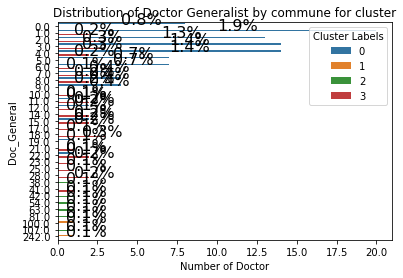

In [157]:
#a=[cluster_1,cluster_2,cluster_3,cluster_4]
#for e in a:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="Doc_General", hue='Cluster Labels', data=gpd2)
plt.title('Distribution of Doctor Generalist by commune for cluster')
plt.xlabel('Number of Doctor')


for p in ax.patches:
  percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height()/2
  ax.annotate(percentage, (x, y),fontsize=16,color="black")

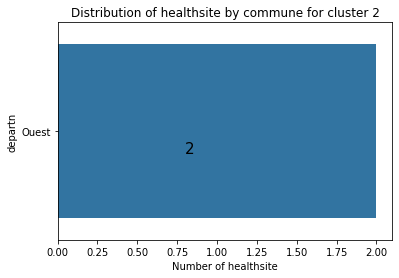

In [138]:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_2)
plt.title('Distribution of healthsite by commune for cluster 2')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 15)

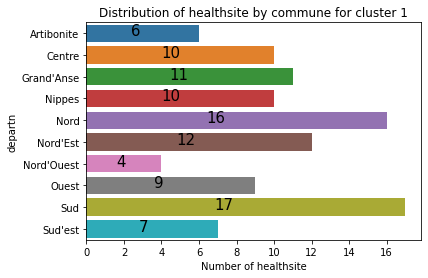

In [137]:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_1)
plt.title('Distribution of healthsite by commune for cluster 1')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage = p.get_width()
        x = p.get_x() + p.get_width() /2.5
        y = p.get_y() + p.get_height()/2 +0.1
        ax.annotate(percentage, (x, y), size = 15)

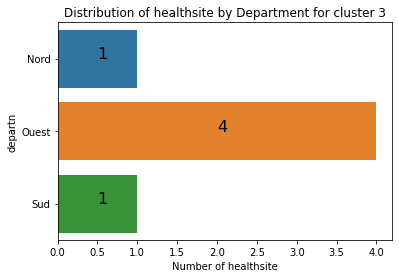

In [249]:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_3)
plt.title('Distribution of healthsite by Department for cluster 3')
plt.xlabel('Number of healthsite')

for p in ax.patches:
        percentage =  p.get_width()
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

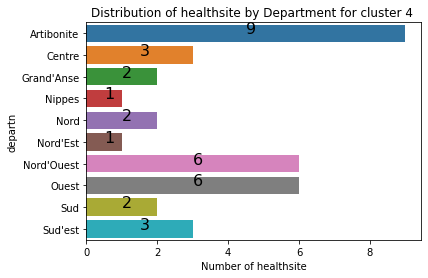

In [250]:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="departn", data=cluster_4)
plt.title('Distribution of healthsite by Department for cluster 4 ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage =  p.get_width()
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [139]:
cluster_3.head()

,Cluster Labels,departn,ADM2_PCODE,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital
52,2,Nord,HT0311,54.0,65.0,160.0,5.0,19.0,4.0,6.0,15.0,6.0,7.0,5.0,22.0,10.0,18.0,13.0,6.0,23.0,24.0,17.0,15.0,4.0,5.0,24.0,21.0,4.0,23.0,18.0,4.0,2.0,6,16,2,2,3,5
98,2,Ouest,HT0113,81.0,58.0,159.0,9.0,24.0,1.0,8.0,15.0,10.0,28.0,23.0,35.0,30.0,33.0,11.0,8.0,33.0,31.0,7.0,20.0,6.0,5.0,36.0,26.0,4.0,23.0,20.0,7.0,8.0,8,24,5,3,10,4
99,2,Ouest,HT0114,63.0,70.0,95.0,7.0,15.0,0.0,3.0,19.0,6.0,21.0,16.0,25.0,19.0,25.0,9.0,6.0,25.0,25.0,7.0,18.0,2.0,4.0,25.0,22.0,4.0,21.0,17.0,6.0,8.0,7,16,3,2,1,7
102,2,Ouest,HT0121,42.0,39.0,140.0,7.0,8.0,5.0,3.0,20.0,6.0,17.0,11.0,22.0,18.0,22.0,8.0,7.0,23.0,24.0,7.0,15.0,1.0,1.0,24.0,20.0,2.0,13.0,11.0,4.0,5.0,8,14,6,3,4,6
105,2,Ouest,HT0131,107.0,106.0,265.0,15.0,31.0,9.0,8.0,23.0,14.0,27.0,13.0,37.0,28.0,37.0,19.0,15.0,39.0,39.0,23.0,32.0,6.0,9.0,40.0,37.0,11.0,32.0,27.0,12.0,12.0,7,29,5,1,11,8


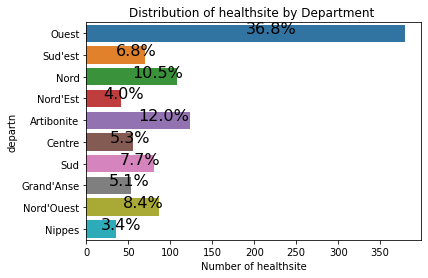

In [124]:
total = len(dfp5['departn'])*1.
ax = sns.countplot(y="departn", data=dfp5)
plt.title('Distribution of healthsite by Department ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

Text(0.5, 0, 'Number of healthsite')

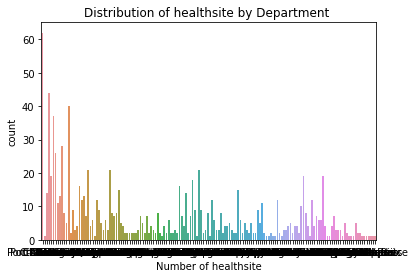

In [129]:
total = len(dfp5['vilcomn'])*50.
ax = sns.countplot(x="vilcomn", data=dfp5)
plt.title('Distribution of healthsite by Department ')
plt.xlabel('Number of healthsite')


#for p in ax.patches:
 #       percentage = '{:.1f}%'.format(100 * p.get_width()/total)
  #      x = p.get_x() + p.get_width()/2
   #     y = p.get_y() + p.get_height()/2
    #    ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [ ]:
total = len(dfp['MGA'])*1.
ax = sns.countplot(y="MGA", data=dfp)
plt.title('Distribution of healthsite by Type ')
plt.xlabel('Number of healthsite by type')

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [ ]:
total = len(df['Private'])*1.
ax = sns.countplot(y="Private", data=df)
plt.title('Distribution of Private healthsite ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")    

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y="departn", hue='Cluster Labels', data=df)
plt.title('Distribution of healthsite by Department in the Clusters ')
plt.xlabel('Number of healthsite')
total = len(df["departn"])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/3
        ax.annotate(percentage, (x, y),fontsize=10,color="black")   

In [ ]:
total = len(df['mixte'])*1.
ax = sns.countplot(y="Cluster Labels",hue='mixte', data=df)
plt.title('Distribution of  healthsite ')
plt.xlabel('Number of healthsite')


for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")

In [ ]:
df.head()

NameError: ignored

In [ ]:
grp1=cluster_1.groupby(['vilcomn']).sum()
grp1

In [ ]:
grp2=cluster_2.groupby(['vilcomn']).sum()
grp2

In [ ]:
grp3=cluster_3.groupby(['vilcomn']).mean()
grp3.T

In [ ]:
grp4=cluster_4.groupby(['departn']).mean()


In [ ]:
dfp2=df[['Hospital','Doc_General','S.Accouchement','S.Chroniques','S.Lab.','Cluster Labels','departn','Nurse']]

In [ ]:
dfp2

In [ ]:
grpfp2=dfp2.groupby(['Cluster Labels']).mean().reset_index()
grpfp2

In [ ]:
total = len(df['mixte'])*1
ax = sns.barplot(x="Cluster Labels",y='Hospital', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")   

In [ ]:

ax = sns.barplot(x="Cluster Labels",y='Doc_General', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
total = len(df['mixte'])*1

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black")   

In [ ]:
ax = sns.barplot(x="Cluster Labels",y='S.Accouchement', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
total = len(df['mixte'])*1

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black") 

In [ ]:
ax = sns.barplot(x="Cluster Labels",y='S.Chroniques', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
total = len(df['mixte'])*1

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black") 

In [ ]:
ax = sns.barplot(x="Cluster Labels",y='S.Lab.', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
total = len(df['mixte'])*1

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black") 

In [ ]:
ax = sns.barplot(x="Cluster Labels",y='Nurse', data=grpfp2)
plt.title('evolution of the clustering')
#plt.xlabel('Number of healthsite')
total = len(df['mixte'])*1

for p in ax.patches:
        percentage = '{:.1f}'.format(p.get_height())
        x = p.get_x() + p.get_width()/2
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y),fontsize=16,color="black") 

In [224]:
gpd2.head()

,ADM2_EN,ADM2_PCODE,x,y,geometry,IHSI_UNFPA_2019_x,Cluster Labels,departn,Doc_General,Tech_lab,Nurse,drugist,Electricity_regular,Ambulance_regular,Machine_radio,Water_run,Hospitalisation,S.Vac_Child,S.Croissance_Child,S_Child,S.Familial_PLanning,S.CPN,S.CPN_vih,S.Accouchement,S.Malaria,S.IST,S.TB,S.VIH,ST.VIH,ST.VIH2,S.Chroniques,S.PChirurgie,SPCésarienne,S.Lab.,S.LabGS,S.TransS,S.Dentaire,mixte,Private,Public,Dispensary,Healthsite with bed,Hospital,index,IHSI_UNFPA_2019_y,indi,indice
0,Abricots,HT0812,-74.315712,18.615110,"POLYGON ((-74.25823 18.65056, -74.25770 18.646...",38701.869598,0.0,Grand'Anse,1.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,44.0,92096.0,0.000478,0.477762
1,Acul du Nord,HT0321,-72.333459,19.643842,"POLYGON ((-72.35332 19.78220, -72.35178 19.780...",60758.627688,3.0,Nord,15.0,10.0,20.0,2.0,1.0,0.0,1.0,7.0,1.0,6.0,5.0,8.0,6.0,8.0,5.0,1.0,8.0,8.0,7.0,1.0,0.0,0.0,8.0,8.0,0.0,7.0,5.0,0.0,1.0,1.0,4.0,3.0,3.0,0.0,1.0,286.0,92096.0,0.003105,3.105455
2,Anse-a-Foleur,HT0922,-72.625602,19.862093,"POLYGON ((-72.63559 19.90707, -72.63690 19.905...",36012.105155,0.0,Nord'Ouest,2.0,3.0,5.0,0.0,1.0,1.0,0.0,2.0,1.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,2.0,1.0,1.0,1.0,4.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,1.0,0.0,87.0,92096.0,0.000945,0.944666
3,Anse-a-Pitre,HT0234,-71.787353,18.155539,"POLYGON ((-71.74680 18.29270, -71.73949 18.290...",42597.347819,0.0,Sud'est,3.0,3.0,9.0,0.0,1.0,1.0,0.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,1.0,2.0,3.0,3.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,0.0,100.0,92096.0,0.001086,1.085823
4,Anse-a-Veau,HT1021,-73.334028,18.467027,"POLYGON ((-73.44109 18.52472, -73.44059 18.524...",35556.460478,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [246]:
gpd2.Public.describe()

count    140.000000
mean       2.421429
std        2.475979
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       15.000000
Name: Public, dtype: float64

Text(0.5, 1.0, 'Hospitalisation Services')

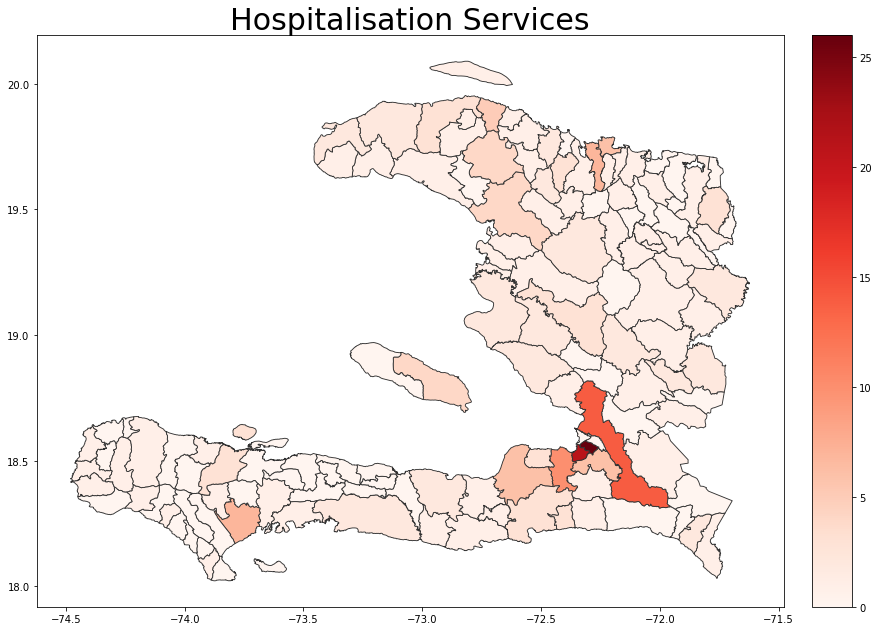

In [236]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='Hospitalisation', cmap='Reds', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Hospitalisation Services',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);

Text(0.5, 1.0, 'Repartition of Public Hospital')

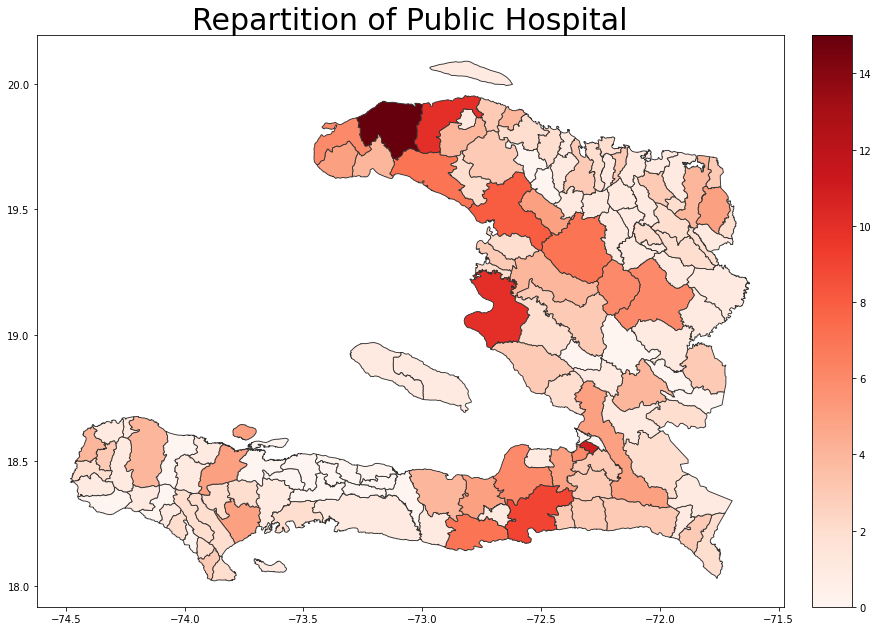

In [241]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='Public', cmap='Reds', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Repartition of Public Hospital',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);

Text(0.5, 1.0, 'Repartition of Population')

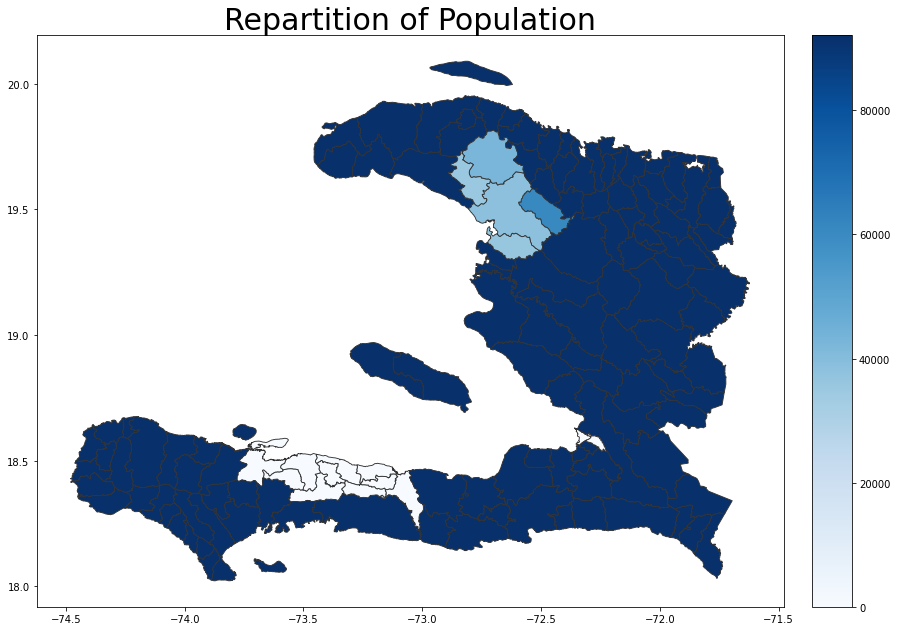

In [240]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='IHSI_UNFPA_2019_y', cmap='Blues', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Repartition of Population',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);

Text(0.5, 1.0, 'Hospital')

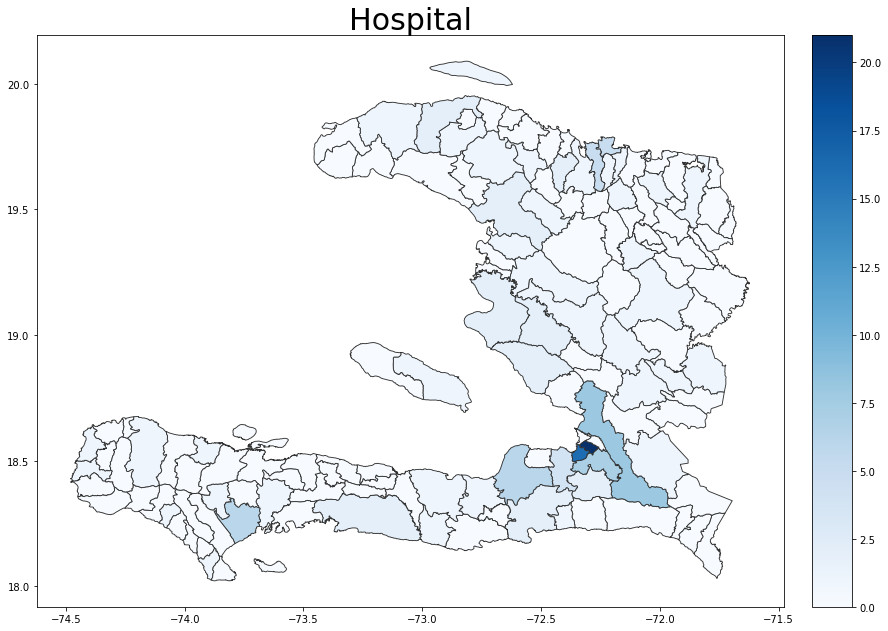

In [230]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='Hospital', cmap='Blues', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Hospital',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);

Text(0.5, 1.0, 'Dispensary')

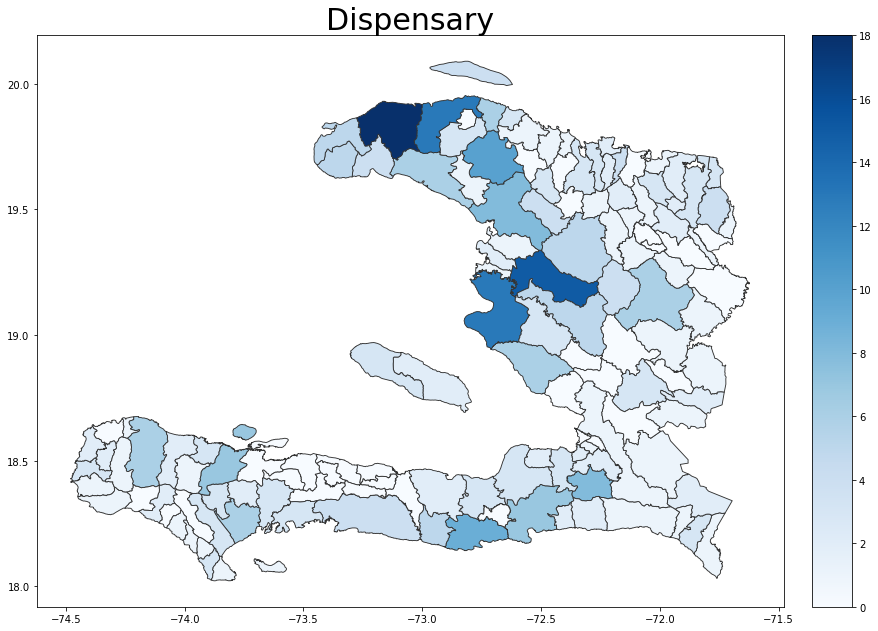

In [228]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='Dispensary', cmap='Blues', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.set_title('Dispensary',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);

In [107]:
gdp1=pd.read_csv('/content/map_health.csv')

Text(0.5, 1.0, 'Indice of health Acces')

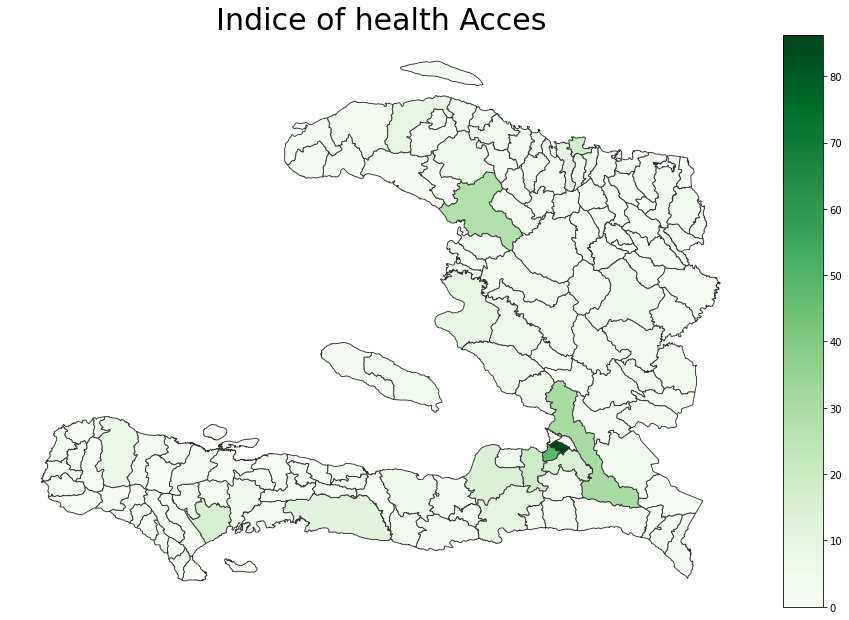

In [257]:
# import labrairie to make locatable axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
# draws choropleth map
fig, ax = plt.subplots(1, 1,figsize =(15,15))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
ax =gpd2.plot(column='indice', cmap='Greens', linewidth=0.9, edgecolor='0.2',legend=True, ax=ax,cax = cax)
ax.axis('off')
ax.set_title('Indice of health Acces',fontsize =30)
#gpd2.apply(lambda x: ax.annotate(s=x['indice'], xy=x.geometry.centroid.coords[0], ha='center',fontsize=2),axis=1);